C:\Users\d1871\Anaconda3\envs\python 37\lib\site-packages\ipykernel_launcher.py:173: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


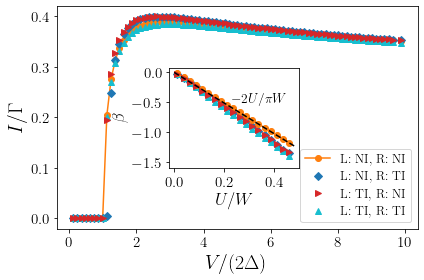

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 15 14:05:14 2021

@author: yentinglin
"""


import numpy as np
from tool.tool_current_noninteracting import current_integrad
from scipy.integrate import quad
import matplotlib.pyplot as plt
from tool.tool_general import loglogder
from matplotlib.pyplot import rc




#%% 

NN=80


D=1.0
T=0.0018
GAMMA=8.0*T*T
d=100.0*GAMMA#*D
#E=0.75*d
E1=-1.0*GAMMA
E2=4.0*GAMMA
     

U=0.05
DT=d/2.0

ans1_c=np.load('data_paper/current_NINI_d=0.002592_U=0.05_E=0.00010368_full_revised.npy')
ans2_c=np.load('data_paper/current_NITI_d=0.002592_U=0.05_E=0.00010368_full_revised.npy')
ans3_c=np.load('data_paper/current_TINI_d=0.002592_U=0.05_E=0.00010368_full_revised.npy')
ans4_c=np.load('data_paper/current_TITI_d=0.002592_U=0.05_E=0.00010368_full_revised.npy')

ans1_d=np.load('data_paper/current_scalingU_NINI_d=0.002592_T=0.0018_E=0.00010368.npy')
ans2_d=np.load('data_paper/current_scalingU_NITI_d=0.002592_T=0.0018_E=0.00010368.npy')
ans3_d=np.load('data_paper/current_scalingU_TINI_d=0.002592_T=0.0018_E=0.00010368.npy')
ans4_d=np.load('data_paper/current_scalingU_TITI_d=0.002592_T=0.0018_E=0.00010368.npy')


#%%


T=0.0018
N=40
D=1.0
T=0.0018
U_MAX=0.5
N=6
NN=40
G=8.0*T*T
gap=100.0*G#*D

exponent_TITI_list=np.zeros(NN,dtype=np.float64)
exponent_NITI_list=np.zeros(NN,dtype=np.float64)
exponent_TINI_list=np.zeros(NN,dtype=np.float64)
exponent_NINI_list=np.zeros(NN,dtype=np.float64)

exponent_analytic_list=np.zeros(NN,dtype=np.float64)
u_list=np.zeros(NN,dtype=np.float64)

mu_list=np.zeros(N,dtype=np.float64)


for i in range(N):
    mu=7.5*d+i*d/N
    mu_list[i]=mu

for i in range(NN):
    U=U_MAX*i/NN
    u_list[i]=U
    exponent_analytic_list[i]=-8.0*U/(np.pi*D)
    #exponent_analytic_list_test[i]=-10.0*U/(np.pi*D)
    
    a=ans1_d[:,i]#/(T*T)
    b=ans2_d[:,i]#/(T*T)
    c=ans3_d[:,i]#/(T*T)
    d=ans4_d[:,i]#/(T*T)
    
    exp_a=loglogder(mu_list,a)
    exp_b=loglogder(mu_list,b)
    exp_c=loglogder(mu_list,c)
    exp_d=loglogder(mu_list,d)
    
    exp_ave_a=np.average(exp_a[1])
    exp_ave_b=np.average(exp_b[1])
    exp_ave_c=np.average(exp_c[1])
    exp_ave_d=np.average(exp_d[1])
    
    exponent_TITI_list[i]=exp_ave_a
    exponent_NITI_list[i]=exp_ave_b
    exponent_TINI_list[i]=exp_ave_c
    exponent_NINI_list[i]=exp_ave_d
    
    

#%%


#%%


rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig,ax=plt.subplots()
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlim([99,106])
my_y_ticks = [0.0,0.1,0.2,0.3,0.4]
plt.yticks(my_y_ticks)


#plt.ylim([1.5,1.7])
#plt.plot(D_LIST,scaling_d,'.-',color='blue',zorder=5)#   
factor=2.0*np.pi

plt.plot(ans1_c[1]/gap,ans1_c[0]/(factor),'o-',label=r"L: \mbox{NI}, R: \mbox{NI}",color='tab:orange',zorder=-7)#
plt.plot(ans2_c[1]/gap,ans2_c[0]/(factor),'D',label=r"L: \mbox{NI}, R: \mbox{TI}",color='tab:blue',zorder=5)#
plt.plot(ans3_c[1]/gap,ans3_c[0]/(factor),'>',label=r"L: \mbox{TI}, R: \mbox{NI}",color='tab:red',zorder=6)#
plt.plot(ans4_c[1]/gap,ans4_c[0]/(factor),'^',label=r"L: \mbox{TI}, R: \mbox{TI}",color='tab:cyan',zorder=5)#

plt.legend(loc='best',fontsize=12.5)
plt.xlabel(r'$V/(2\Delta)$',fontsize=20)
plt.ylabel(r"$I/\Gamma$",fontsize=20)
plt.tight_layout()




ax2 = fig.add_axes([0.4, 0.4, 0.3, 0.35])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#ax.xaxis.set_minor_locator(MultipleLocator(100))

#plt.plot(sub_lattice,np.abs(density_vertex_a_1-density_vertex_a_1[-1]),'o'  ,color='tab:orange',zorder=10,label=r"$U=%g$"%(U[0]),rasterized=True)
#plt.plot(sub_lattice,np.abs(density_vertex_a_2-density_vertex_a_2[-1]),'o'  ,color='tab:blue',label=r"$U=%g$"%(U[0]),rasterized=True)
#plt.plot(sub_lattice,decay_FRG[3,:],'--',color='k',zorder=30,markerfacecolor='none',label=r"$U=%g$"%(U[3]),rasterized=True)
plt.xlim([-0.02,0.5])
plt.ylim([-1.6,0.08])
#plt.ylim([3e4,1e9])
#plt.ylim([1e-1,1e5])
my_y_ticks = [0.0,-0.5,-1.0,-1.5]
plt.yticks(my_y_ticks)
my_x_ticks = [0.0,0.2,0.4]
plt.xticks(my_x_ticks)

plt.plot(u_list[1:-1:2],exponent_TITI_list[1:-1:2],'o-' ,color='tab:orange',label=r"L: \mbox{TI}, R: \mbox{TI}",zorder=-3)#
plt.plot(u_list[1:-1:2],exponent_NITI_list[1:-1:2],'D' ,color='tab:blue',label=r"L: \mbox{NI}, R: \mbox{TI}",zorder=-4)#

plt.plot(u_list[1:-1:2],exponent_TINI_list[1:-1:2],'>' ,color='tab:red',label=r"L: \mbox{TI}, R: \mbox{NI}",zorder=-3)#
plt.plot(u_list[1:-1:2],exponent_NINI_list[1:-1:2],'^' ,color='tab:cyan',label=r"L: \mbox{NI}, R: \mbox{NI}",zorder=-4)#

plt.plot(u_list,exponent_analytic_list,'--' ,color='k',label=r"$-4U/D\pi$",zorder=4)#

ax2.text(0.23, -0.5,'$-2U/\pi W $',fontsize=13.5,zorder=5)

#plt.legend(loc='best',fontsize=12)
#plt.xlabel(r'$\Delta t$',fontsize=20)
#plt.ylabel(r'$\Delta^{HF,\Lambda}/\Delta$',fontsize=20)
plt.ylabel(r'$\beta$',fontsize=17)
plt.xlabel(r'$U/W$',fontsize=17)
plt.tight_layout()

plt.savefig('plot/current_frg_large.png',format='png',dpi=300)
#plt.savefig('plot/current_SSH_d=%g.png'%(d),format='png',dpi=300)

#plt.savefig('plot/IRLM_RGflow_tau_SSH_gap=0.0015.pdf',format='pdf',dpi=300)
plt.show()  